# Metodologia 

1. Entender / Definir: O que queremos resolver?
    - Prever número de óbtos infantis em um país com base em indicadores de saúde daquele ano.
2. Quais dados estão disponíveis que possivelmente tem poder preditivo sobre o evento que se quer modelar (target)?
    - Aqui trabalharemos com dataset [Life Expecxtancy Data do Kaggle](https://www.kaggle.com/datasets/maryalebron/life-expectancy-data?resource=download) e avaliar os dados melhores.
3. Fazer análise exploratória dos dados
4. Dividir os dados em treino e teste 
5. Tratar os dados
6. Treinar o modelo
7. Fazer previsões 
8. Avaliar a performance

Após avaliar a performance volta-se no passo 5 e aplica-se diferentes tratamentos de dados e hyperparametros no modelo.

# Carrega Pacotes

In [1]:
# instala os pacotes no computador
# !pip install pandas
# !pip install matplotlib

# importa os pacotes para usar nesse notebook
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados

In [2]:
df1 = pd.read_csv('Life Expectancy Data v2.csv')
df = df1.copy()

# 3. Análise exploratória dos dados

Primeiramente, olhamos para a "cara" do dataset. Quais colunas temos, quais informações elas trazem.

In [3]:
df.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

Todas as colunas são numéricas com execeção de "Status" e "Country". Não usaremos a informação de país e transformaremos a variável Status em um binário, sendo 1 para "Developed" e 0 para "Developing".

In [5]:
df.Status = df1.Status.map({'Developing': 0, "Developed": 1})
df.drop(columns=['Country'], inplace=True, errors='ignore')

In [6]:
df.columns.nunique()

24

Agora temos 24 colunas no dataset, todas numéricas.

In [7]:
df.columns

Index(['Year', 'Status', 'Life expectancy (men)', 'Life expectancy(women)',
       'Adult Mortality (men)', 'Adult Mortality (women)', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B(men)',
       'Hepatitis B(women)', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Note que nem todas as colunas tem dados em todas as linhas.


In [8]:
df.isna().sum()

Year                                 0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Vamos preencher os valores nulos com a média da coluna.

In [9]:
for column in df.columns:
    col_mean = df[column].mean()
    df[column].fillna(col_mean, inplace=True)

In [10]:
df.isna().sum()

Year                               0
Status                             0
Life expectancy (men)              0
Life expectancy(women)             0
Adult Mortality (men)              0
Adult Mortality (women)            0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B(men)                   0
Hepatitis B(women)                 0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Não há mais valores nulos no dataframe.

In [11]:
df.describe()

,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,67.710007,67.629340,74.732811,74.558203,30.303948,4.602861,738.251295,46.011572,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,10.346219,10.325241,14.728866,14.682064,117.926501,3.916288,1987.914858,16.558741,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,0.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.010000,0.000000,18.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,59.000000,59.000000,62.000000,62.000000,0.000000,1.092500,4.685343,31.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,68.000000,67.500000,74.500000,74.000000,3.000000,4.160000,64.912906,46.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,0.000000,77.000000,76.000000,87.000000,87.000000,22.000000,7.390000,441.534144,60.000000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,85.000000,85.000000,100.000000,100.000000,1800.000000,17.870000,19479.911610,75.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Vamos olhar para as correlações.

<Axes: >

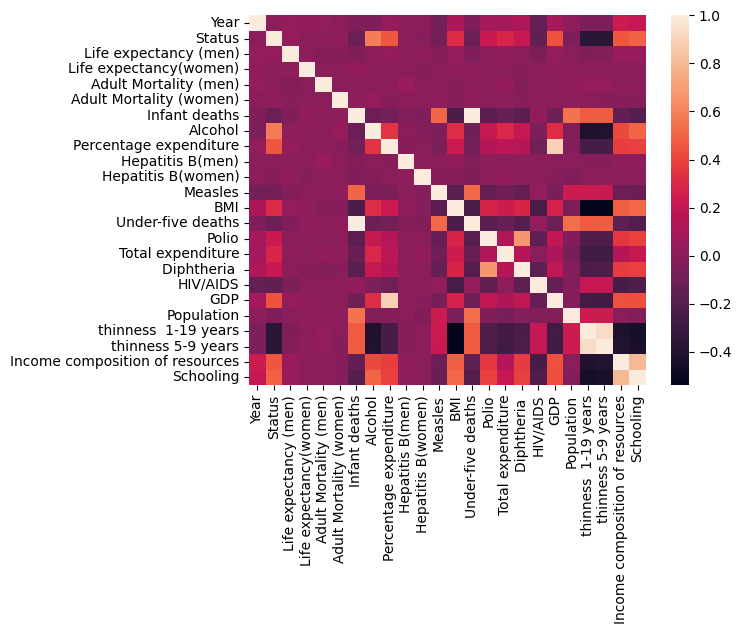

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

As maiores correlações com `infant death` são `Under-five deaths` (que é basicamente o mesmo dado),`Meases` (sarampo, que atinge principalmente crianças), `Population`, `thinness  1-19 years` e `thinness 5-9 years`.

# 4. Dividir os dados em treino e teste

O objetivo é criar uma base desconhecida para o modelo durante o treinamento de maneira a ter uma referência de como o modelo performa em dados que ele nunca viu. O treinamento de um modelo de machine learning o ensina a fazer inferências sobre a população (previsões) a partir de uma amostra (dados de treino). Para garantir que o modelo aprendeu o comportamento geral do fenômeno (tem baixo underfitting) e aprendeu pouco ruído (baixo overfitting), testamos a performance nos dados de teste como uma inferência da população (a partir da amostra dos dados de teste) não enviesada pelo treinamento.

Vamos retirar também a coluna 'Under-five deaths' pois é basicamente o target que estamos tentando prever.

In [13]:
target_col = 'Infant deaths' 
# dados de treino (sem target) 
train_df = df.drop(columns=[target_col, 'Under-five deaths'])
# dados só do que desejamos prever
target = df[target_col]

In [24]:
# !pip install scikit-learn

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(train_df, target, test_size=0.3, random_state=42)


In [25]:
print("Tamanho do dataset x_train: ", x_train.shape)
print("Tamanho do dataset y_train: ", y_train.shape)
print("Tamanho do dataset x_test: ", x_test.shape)
print("Tamanho do dataset y_test: ", y_test.shape)

Tamanho do dataset x_train:  (2056, 22)
Tamanho do dataset y_train:  (2056,)
Tamanho do dataset x_test:  (882, 22)
Tamanho do dataset y_test:  (882,)


# 5. Treinar modelo

In [26]:
from sklearn.linear_model import LinearRegression

#instanciando um modelo de regressão linear
modelo = LinearRegression()

# treinar o modelo
modelo.fit(x_train,y_train)


LinearRegression()

# 6. Fazer previsões


In [27]:
y_pred = modelo.predict(x_test)
y_train_pred = modelo.predict(x_train)

# 7. Avaliar a performance


In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


print("erro médio absoluto: ", mean_absolute_error(y_test, y_pred))
print("erro médio quadrado: ", mean_squared_error(y_test, y_pred))
print("raiz do erro médio quadrado: ", mean_squared_error(y_test, y_pred, squared=False))


erro médio absoluto:  35.80646311006339
erro médio quadrado:  6701.435964567304
raiz do erro médio quadrado:  81.86229879845364


A regressão linear fez previsões com métricas de performance acima nos dados de teste. Para saber o quão bom é essa previsão, vamos calcular uma baseline, isto é, um valor de referência. Usaremos como valor de referência qual seria o erro médio absluto de usar a média dos dados de treino como previsão para todos os dados de teste. 

In [29]:
print("erro médio absoluto: ", mean_absolute_error(y_test, [y_train.mean() for x in range(len(y_test))]))
print("erro médio quadrado: ", mean_squared_error(y_test, [y_train.mean() for x in range(len(y_test))]))
print("raiz do erro médio quadrado: ", mean_squared_error(y_test, [y_train.mean() for x in range(len(y_test))],squared=False))


erro médio absoluto:  42.996695695139266
erro médio quadrado:  17430.337293384175
raiz do erro médio quadrado:  132.02400271687029


O modelo criado é significativamente melhor que usar a média dos dados de treino.

# Testando outros algoritmos

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor


# Lista com os nomes dos modelos
model_names = [
    'Linear Regression', 'K-Neighbors Regression', 'Decision Tree Regression',
    'Random Forest Regression','Extra Trees Regression','GaussianProcessRegressor'
]

# Lista com as instâncias dos modelos
models = [
    LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(),
    RandomForestRegressor(), ExtraTreesRegressor(), GaussianProcessRegressor()
]

# Treina, faz previsões e gera métricas para todos os modelos
for name, model in zip(model_names, models):
    print(f"\nModel: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred))
    print("Erro quadrado médio: ", mean_squared_error(y_test, y_pred))
    print("Raiz do erro quadrado médio: ", mean_squared_error(y_test, y_pred,squared=False))


Model: Linear Regression
Erro médio absoluto:  35.80646311006339
Erro quadrado médio:  6701.435964567304
Raiz do erro quadrado médio:  81.86229879845364

Model: K-Neighbors Regression
Erro médio absoluto:  32.178231292517005
Erro quadrado médio:  9300.072108843537
Raiz do erro quadrado médio:  96.4368814761424

Model: Decision Tree Regression
Erro médio absoluto:  14.319727891156463
Erro quadrado médio:  2269.233560090703
Raiz do erro quadrado médio:  47.636473002214416

Model: Random Forest Regression
Erro médio absoluto:  13.030907029478458
Erro quadrado médio:  1102.4772217687073
Raiz do erro quadrado médio:  33.20357242479651

Model: Extra Trees Regression
Erro médio absoluto:  10.626269841269842
Erro quadrado médio:  727.2188304988662
Raiz do erro quadrado médio:  26.96699520708353

Model: GaussianProcessRegressor
Erro médio absoluto:  34.06689342403628
Erro quadrado médio:  18561.97619047619
Raiz do erro quadrado médio:  136.24234360314048


O modelo com a melhor performance foi Extra Trees.

# Selecionando variáveis

Uma possível maneira de melhorar a performance do modelo é selecionar colunas com maior poder preditivo. Para isso, olharemos para feature importance do modelo de árvore que treinamos (ExtraTrees). A partir disso, pegaremos as 10 melhores e treinaremos um modelo só com essas 10.

In [31]:
et_model = ExtraTreesRegressor()
et_model.fit(x_train, y_train)
y_pred = et_model.predict(x_test)
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred))
print("Erro quadrado médio: ", mean_squared_error(y_test, y_pred))
print("Raiz do erro quadrado médio: ", mean_squared_error(y_test, y_pred,squared=False))

feature_importance = et_model.feature_importances_

# Criar um DataFrame com as importâncias das features
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Ordenar o DataFrame em ordem decrescente de importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


Erro médio absoluto:  10.985487528344672
Erro quadrado médio:  742.6158072562358
Raiz do erro quadrado médio:  27.250978097239663
                            Feature  Importance
18             thinness  1-19 years    0.330824
19               thinness 5-9 years    0.306661
10                          Measles    0.115867
17                       Population    0.066157
6                           Alcohol    0.029303
15                         HIV/AIDS    0.024173
11                              BMI    0.019937
21                        Schooling    0.018695
12                            Polio    0.014583
13                Total expenditure    0.013848
20  Income composition of resources    0.013628
14                      Diphtheria     0.012104
0                              Year    0.008177
16                              GDP    0.006499
7            Percentage expenditure    0.005050
2             Life expectancy (men)    0.003042
9                Hepatitis B(women)    0.002676
8     

In [36]:
selected_cols = importance_df.iloc[:10].Feature

et_model = ExtraTreesRegressor()
et_model.fit(x_train[selected_cols], y_train)
y_pred = et_model.predict(x_test[selected_cols])
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred))
print("Erro quadrado médio: ", mean_squared_error(y_test, y_pred))
print("Raiz do erro quadrado médio: ", mean_squared_error(y_test, y_pred,squared=False))

Erro médio absoluto:  9.662312925170069
Erro quadrado médio:  693.4766630385487
Raiz do erro quadrado médio:  26.333945071685495


Treinar o modelo com apenas as 10 melhores features diminui as métricas de erro, criando um modelo melhor.

# Próximos passos

Para melhorar a performance do modelo, pode-se tomar as seguintes ações:
 - Normalizar os dados: principalmente para modelos lineares, como a regressão linear, normalizar os dados pode melhorar a performance, principalmente quando se tem features de muitas ordens de grandeza de diferença.
 - Aplicar transformações nos dados para aproximar a distribuição das features de uma distribuição normal. Esse processamento é mais efetivo para modelos lineares também.
 - Otimizar hyperparametros